# Economics of Peace: Data Analysis Notebook


### Basic Information

The Israel-Hamas War has been a focal point of geopolitical tension, with recurrent conflicts affecting the region. These events often lead to humanitarian crises; however, less attention is paid to the economic impacts and the entities that financially gain from such conflicts. This study aims to fill that knowledge gap and contribute to the discussion on conflict economics, specifically in the context of the Middle East

### Project Objectives

To conduct a comprehensive analysis of the financial entities and sectors that have either benefited or demonstrated resilience in the wake of recent events in Gaza, thereby understanding the economic dimensions of the conflict. The project aims to analyze the economic impacts of conflicts in the Israel-Palestine War by examining various financial, defense, healthcare, construction, and energy sectors.


In [465]:
# Please do not delete this cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1. Data Loading

### Dataset 1: Stockholm International Peace Research Institute Data
(https://www.sipri.org/)

### a) All Arms Imports from 1950-2022


In [466]:
'''TIV of arms exports from all, 1950-2022
Figures are SIPRI Trend Indicator Values (TIVs) expressed in millions.
Figures may not add up due to the conventions of rounding.
A '0' indicates that the value of deliveries is less than 0.5m
For more information, see http://www.sipri.org/databases/armstransfers/sources-and-methods/


Source: SIPRI Arms Transfers Database
Generated: 05 December 2023'''

all_arms_imports = pd.read_csv("sipri/TIV-Import-All-1950-2022.csv", index_col="Arms Category")
all_arms_imports

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Arms Category,,,,,,,,,,,,,,,,,,,,,
Aircraft,5301.0,6723.0,11666.0,15567.0,12853.0,12598.0,14073.0,13705.0,15960.0,10357.0,...,11470,12846.0,12394,14028,11907,14031,11412,13480,14851,965706
Air defence systems,NaN,NaN,42.0,42.0,56.0,197.0,358.0,480.0,605.0,1300.0,...,1255,1902.0,2410,1741,1662,988,566,704,1394,125939
Armoured vehicles,1024.0,993.0,2419.0,3980.0,2881.0,2349.0,4053.0,3890.0,3187.0,3211.0,...,2951,2706.0,3880,3148,3026,2807,2564,2651,3299,286344
Artillery,337.0,556.0,674.0,740.0,572.0,810.0,946.0,740.0,700.0,659.0,...,267,300.0,282,184,352,383,444,295,650,50217
Engines,481.0,773.0,818.0,1155.0,1024.0,1085.0,1460.0,1337.0,1168.0,918.0,...,1413,1515.0,1544,1366,1736,1944,1678,1646,1490,61103
Missiles,NaN,NaN,NaN,NaN,NaN,57.0,55.0,49.0,704.0,1105.0,...,3188,3143.0,4237,4303,4223,3663,2971,2806,4565,190809
Naval weapons,1.0,12.0,NaN,133.0,40.0,129.0,148.0,181.0,103.0,140.0,...,287,182.0,161,175,233,155,153,180,257,12769
Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,163,200.0,119,142,124,445,311,249,232,7538
Satellites,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100,NaN,100,100,50,50,50,10,10,520


### B) All Arms Exports from 1950-2022

In [467]:
'''TIV of arms exports from all, 1950-2022
Figures are SIPRI Trend Indicator Values (TIVs) expressed in millions.
Figures may not add up due to the conventions of rounding.
A '0' indicates that the value of deliveries is less than 0.5m
For more information, see http://www.sipri.org/databases/armstransfers/sources-and-methods/


Source: SIPRI Arms Transfers Database
Generated: 05 December 2023'''

all_arms_exports = pd.read_csv("sipri/TIV-Export-All-1950-2022.csv", index_col="Arms Category")
all_arms_exports

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Arms Category,,,,,,,,,,,,,,,,,,,,,
Aircraft,5301.0,6723.0,11666.0,15567.0,12853.0,12598.0,14073.0,13705.0,15960.0,10357.0,...,11470,12846.0,12394,14028,11907,14031,11412,13480,14851,965706
Air defence systems,NaN,NaN,42.0,42.0,56.0,197.0,358.0,480.0,605.0,1300.0,...,1255,1902.0,2410,1741,1662,988,566,704,1394,125939
Armoured vehicles,1024.0,993.0,2419.0,3980.0,2881.0,2349.0,4053.0,3890.0,3187.0,3211.0,...,2951,2706.0,3880,3148,3026,2807,2564,2651,3299,286344
Artillery,337.0,556.0,674.0,740.0,572.0,810.0,946.0,740.0,700.0,659.0,...,267,300.0,282,184,352,383,444,295,650,50217
Engines,481.0,773.0,818.0,1155.0,1024.0,1085.0,1460.0,1337.0,1168.0,918.0,...,1413,1515.0,1544,1366,1736,1944,1678,1646,1490,61103
Missiles,NaN,NaN,NaN,NaN,NaN,57.0,55.0,49.0,704.0,1105.0,...,3188,3143.0,4237,4303,4223,3663,2971,2806,4565,190809
Naval weapons,1.0,12.0,NaN,133.0,40.0,129.0,148.0,181.0,103.0,140.0,...,287,182.0,161,175,233,155,153,180,257,12769
Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,163,200.0,119,142,124,445,311,249,232,7538
Satellites,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100,NaN,100,100,50,50,50,10,10,520


### b) Top 200 countries Imports from 1950-2022

In [468]:
'''TIV of arms imports to the top 200 largest importers, 1950-2022
Figures are SIPRI Trend Indicator Values (TIVs) expressed in millions
Figures may not add up due to the conventions of rounding.
A '0' indicates that the value of deliveries is less than 0.5m
For more information, see http://www.sipri.org/databases/armstransfers/sources-and-methods/

Source: SIPRI Arms Transfers Database
Generated: 05 December 2023'''

top_200_arms_imports = pd.read_csv("sipri/TIV-Import-Top-200-1950-2022.csv", index_col="Rank 1950-2022")
top_200_arms_imports

,Recipient,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,1950-2022
Rank 1950-2022,,,,,,,,,,,,,,,,,,,,,
1.0,India,141.0,277.0,104.0,430.0,265.0,350.0,366.0,980.0,954.0,...,3330.0,2928.0,2782.0,2892.0,2118.0,3470.0,2847.0,4167.0,2846.0,134906
2.0,China,2572.0,2197.0,3430.0,3144.0,3500.0,1730.0,2255.0,2126.0,2778.0,...,1082.0,1231.0,1143.0,1306.0,2119.0,1503.0,884.0,981.0,807.0,82678
3.0,Saudi Arabia,0.0,NaN,7.0,1.0,2.0,16.0,10.0,72.0,37.0,...,2743.0,3389.0,2947.0,3920.0,3276.0,3484.0,2491.0,1739.0,2272.0,74581
4.0,Egypt,152.0,46.0,0.0,1.0,133.0,755.0,1160.0,996.0,391.0,...,430.0,1444.0,1643.0,2340.0,1638.0,1157.0,1403.0,1287.0,701.0,70333
5.0,Japan,NaN,NaN,8.0,223.0,280.0,412.0,763.0,1059.0,1199.0,...,329.0,356.0,345.0,434.0,755.0,972.0,923.0,947.0,1291.0,69147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198.0,Khmer Rouge (Cambodia)*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
199.0,Lebanon Palestinian rebels*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
200.0,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,NaN,15.0,NaN,5.0,1.0,2.0,24


### d) Top 200 countries Arms Exports from 1950-2022

In [469]:
'''TIV of arms exports from the top 200 largest exporters, 1950-2022
Figures are SIPRI Trend Indicator Values (TIVs) expressed in millions
Figures may not add up due to the conventions of rounding.
A '0' indicates that the value of deliveries is less than 0.5m
For more information, see http://www.sipri.org/databases/armstransfers/sources-and-methods/

Source: SIPRI Arms Transfers Database
Generated: 05 December 2023'''

top_200_arms_exports = pd.read_csv("sipri/TIV-Export-Top-200-1950-2022.csv", index_col="Rank 1950-2022")
top_200_arms_exports

,Supplier,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,1950-2022
Rank 1950-2022,,,,,,,,,,,,,,,,,,,,,
1.0,United States,1388.0,4057.0,6944.0,9814.0,6099.0,7190.0,8573.0,8587.0,9564.0,...,9588.0,9918.0,9769.0,11732.0,9674.0,10888.0,9426.0,10994.0,14515.0,729161.0
2.0,Soviet Union,3974.0,3602.0,5883.0,8534.0,8625.0,5762.0,6334.0,6645.0,7946.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450786.0
3.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5467.0,5927.0,6811.0,6199.0,7173.0,5627.0,3904.0,2857.0,2820.0,155926.0
4.0,United Kingdom,2285.0,3468.0,3253.0,4607.0,4473.0,4808.0,6012.0,5026.0,3950.0,...,1658.0,1177.0,1339.0,1117.0,683.0,910.0,625.0,656.0,1504.0,144569.0
5.0,France,9.0,67.0,43.0,263.0,279.0,413.0,930.0,661.0,789.0,...,1755.0,2263.0,2155.0,2355.0,1998.0,3612.0,2378.0,3853.0,3021.0,136347.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
134.0,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
135.0,United Nations**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## Dataset 2: Bloomberg Intelligence Market Data
(https://www.bloomberg.com/professional/product/bloomberg-intelligence/)
#####  via SRZ LIBRARY at SCHULTE ROTH & ZABEL (https://www.srz.com) This document, the information contained herein and any derived information created therefrom are for the exclusive use of SRZ LIBRARY at SCHULTE ROTH & ZABEL.

#### Construction & Real Estate, Aerospace & Defense, US Defense Budget, and Cybersecurity Sector market data
##### REFERENCE: In any grid on either tab, there are common columns:
1) Description:  The row label that matches the row label you'd find on BI
2) Ticker:  The company/index ticker corresponding to that row (this is the ticker used in the BDP/BDH formula for that row, if applicable)
3) Field ID:  The calcrout ID used to structure the BDP/BDH formula for that row (where applicable).
4) Field Mnemonic:  The calcrout mnemonic corresponding to the field ID used to structure the BDP/BDH formula for that row (where applicable).
5) Data State:  The state of the data within that particular row, including 'Dynamic', 'Static', 'Sum', 'Average', 'Median' or 'Heading'.  If 'Dynamic' then new data will be expected to come to the sheet when it becomes available in the database with no need for another export. If 'Static' then there are no live links in this row and new data will only be procured by running and exporting from BI again. If it's 'Sum', 'Average', 'Median' or 'Expression', then new data may come to the sheet for some expression components, but to ensure the latest data is present in the sheet, BI should be run and exported again.

In [470]:
# The US & CAN Construction & Real Estate financial data from 1984-2023

bloom_consg_USCAN = pd.read_csv("bloomberg/BI_CONSG_1 DATA US CAN.csv", index_col="Description")
bloom_consg_USCAN

,Ticker,Field ID,Field Mnemonic,Data State,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Description,,,,,,,,,,,,,,,,,,,,,
* Switch View For More Data,NaN,NaN,NaN,Heading,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,Heading,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FW Dodge Construction Index,DODGINDX Index,PR005,PX_LAST,Dynamic,45.821,51.028,54.735,56.809,59.389,59.132,...,120.000,127.000,130.000,156.000,150.00,171.000,175.000,188.000,251.000,253.000
US Construction Spending Monthly ($m),NaN,NaN,NaN,Heading,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U.S. Total Construction Spending (NSA),CNNSTOTA Index,PX385,INTERVAL_SUM,Dynamic,370191.000,403414.000,433453.000,446642.000,462013.000,477501.000,...,1015292.000,1132117.000,1213146.000,1279841.000,1333184.00,1391038.000,1499570.000,1653378.000,1848676.000,1463494.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Housing Starts,NaN,NaN,NaN,Static,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada Total Housing New Starts SAAR (000's),CAHSTOTL Index,PR005,PX_LAST,Dynamic,129.900,190.600,214.500,220.300,225.000,221.100,...,177.296,171.248,202.693,214.309,214.99,199.555,240.421,245.205,248.648,274.681
New Starts - Urban Area SAAR (000's),CAHSURBA Index,PR005,PX_LAST,Dynamic,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [471]:
#The Cybersecurity Equity Fund flows financial data over the past year

bloom_cybersec_equity_flows = pd.read_csv("bloomberg/BI_ETFSG_1 Sector keyword cybersecurity fundflows equity.csv", index_col="Description")
bloom_cybersec_equity_flows

,Ticker,Field ID,Field Mnemonic,Data State,22-Oct,22-Nov,22-Dec,23-Jan,23-Feb,23-Mar,23-Apr,23-May,23-Jun,23-Jul,23-Aug,23-Sep,23-Oct,23-Nov
Description,,,,,,,,,,,,,,,,,,
All tickers and data are US listed,NaN,NaN,NaN,Heading,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector Focus Flows ($ Mln),NaN,NaN,NaN,Sum,6956.928958,5155.211908,-4289.548643,-1698.242326,-5367.751881,-3002.108335,-260.546345,3038.742870,-7144.903525,8093.002025,-846.931405,-7938.523547,-5886.782483,NaN
Communications,NaN,NaN,NaN,Sum,501.660050,-73.034899,-78.026331,114.999956,-26.877201,162.345411,945.694498,696.853327,171.451648,908.744319,381.226156,-1049.349721,89.286933,NaN
Global X MSCI China Communicat,CHIC US Equity,NaN,NaN,Expression,0.000000,0.000000,-0.388800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.702000,0.000000,NaN
Vanguard Communication Service,VOX US Equity,NaN,NaN,Expression,-26.756500,104.081000,-11.844000,-12.899349,22.970250,-98.185500,33.857250,-38.923750,8.012000,255.757750,93.558000,21.327500,-169.954750,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
First Trust Indxx Metaverse ET,ARVR US Equity,NaN,NaN,Expression,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
Fidelity Metaverse ETF,FMET US Equity,NaN,NaN,Expression,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.253581,1.362070,0.000000,0.007995,0.000000,NaN
iShares Future Metaverse Tech,IVRS US Equity,NaN,NaN,Expression,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [472]:
# The US Defense Budget from 1999-2023

bloom_def_budget = pd.read_csv("bloomberg/BI_DEFCG_1Defense Budget.csv", index_col="Description")
bloom_def_budget

,Ticker,Field ID,Field Mnemonic,Data State,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Description,,,,,,,,,,,,,,,,,,,,,
Defense Budgets (in Bn $USD).,NaN,NaN,NaN,Heading,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U.S. Dept of Defense Budget (incl. OCO).,NaN,NaN,NaN,Heading,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Defense Budget Fiscal Year.,NaN,NaN,NaN,Static,NaN,NaN,NaN,NaN,NaN,NaN,...,15.000,16.000,17.000,18.000,19.000,20.000,21.000,22.000,23.000,24.0
Total Budget Authority (Account 051),NaN,NaN,NaN,Static,290.5,309.9,345.6,437.9,471.0,483.9,...,581.300,592.300,590.578,646.929,695.091,723.224,703.723,715.000,773.000,842.0
Operation and Maintenance,NaN,NaN,NaN,Static,108.8,115.8,133.9,178.3,189.8,179.2,...,199.400,250.800,251.840,272.966,284.553,300.401,283.395,290.361,309.343,329.7
Procurement,NaN,NaN,NaN,Static,55.0,62.6,62.7,78.5,83.1,96.6,...,90.400,115.000,112.247,125.414,144.545,140.711,141.672,133.640,145.939,170.0
"Research, Development, Test, and Evaluation",NaN,NaN,NaN,Static,38.7,41.6,48.7,58.1,64.6,68.8,...,63.500,70.000,72.129,83.658,92.634,104.963,106.447,111.964,130.097,145.0
Other,NaN,NaN,NaN,Static,78.9,82.3,93.6,115.7,122.2,128.5,...,140.900,150.200,154.362,164.891,173.359,177.149,172.209,179.034,187.620,197.3
NOTE: U.S. budgets are placed in column,NaN,NaN,NaN,Heading,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [473]:
# The Aerospace & Defense Industry market data for the past year from 1999-2023

bloom_def_industry = pd.read_csv("bloomberg/BI_AEROG_1 Defense Industry.csv", index_col="Description")
bloom_def_industry

,Ticker,Field ID,Field Mnemonic,Data State,Nov-23,Oct-23,Sep-23,Aug-23,Jul-23,Jun-23,...,Sep-17,Aug-17,Jul-17,Jun-17,May-17,Apr-17,Mar-17,Feb-17,Jan-17,Dec-16
Description,,,,,,,,,,,,,,,,,,,,,
Monthly Boeing/Airbus Orders (Units).,NaN,NaN,NaN,Heading,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Narrowbody Unit Orders,NaN,NaN,NaN,Sum,NaN,83.0,13.0,87.0,49.0,835.0,...,40.0,10.0,-2.0,132.0,30.0,6.0,14.0,-6.0,1.0,261.0
Airbus,AIR FP Equity,BI047,BICS_SEGMENT_DATA,Dynamic,NaN,83.0,13.0,87.0,49.0,835.0,...,40.0,10.0,-2.0,132.0,30.0,6.0,14.0,-6.0,1.0,261.0
Boeing,BA US Equity,BI047,BICS_SEGMENT_DATA,Dynamic,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Widebody Unit Orders,NaN,NaN,NaN,Sum,NaN,12.0,67.0,7.0,40.0,75.0,...,27.0,2.0,13.0,78.0,30.0,13.0,13.0,1.0,19.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Monthly Trends (Flights - actual),AEROBMTA Index,PR005,PX_LAST,Dynamic,NaN,NaN,424906.0,422236.0,413462.0,428102.0,...,387788.0,385844.0,361778.0,375288.0,384882.0,374200.0,386464.0,343368.0,347614.0,346330.0
Domestic,AEROBMDA Index,PR005,PX_LAST,Dynamic,NaN,NaN,368388.0,362910.0,349292.0,363440.0,...,335710.0,330508.0,304052.0,315106.0,324304.0,313664.0,322960.0,289696.0,291776.0,289872.0
International,AEROBMIA Index,PR005,PX_LAST,Dynamic,NaN,NaN,56518.0,59326.0,64170.0,64662.0,...,52078.0,55336.0,57726.0,60182.0,60578.0,60536.0,63504.0,53672.0,55838.0,56458.0


### Dataset 3: GDP via The World Bank
#### Source: The World Bank: DataBank "World Development Indicators"
##### World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates. [Note: Even though Global Development Finance (GDF) is no longer listed in the WDI database name, all external debt and financial flows data continue to be included in WDI. The GDF publication has been renamed International Debt Statistics (IDS), and has its own separate database, as well
(https://databank.worldbank.org/databases#)

In [474]:
gdp = pd.read_csv("world_bank/GDP_1960-2022.csv", index_col="Country Name")
gdp

,Series Name,Series Code,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,GDP (current US$),NY.GDP.MKTP.CD,AFG,537777811.111111,548888895.555556,546666677.777778,751111191.111111,800000044.444444,1006666637.77778,1399999966.66667,...,20564485419.1684,20550582746.8448,19998143635.873,18019554403.4503,18896353155.8839,18418860354.4238,18904502222.2108,20143451705.7548,14583135236.5744,..
Albania,GDP (current US$),NY.GDP.MKTP.CD,ALB,..,..,..,..,..,..,..,...,12776224537.2743,13228147516.1168,11386853143.152,11861199830.8396,13019726211.7369,15156424061.9815,15401826080.5183,15162734205.2462,17930565118.8176,18882095517.8768
Algeria,GDP (current US$),NY.GDP.MKTP.CD,DZA,2723615449.12903,2434747053.99859,2001444542.3228,2702982015.48253,2909316432.96736,3136284304.35366,3039859185.0275,...,209755003250.664,213809980720.787,165979224316.667,160034212613.438,170096989042.831,174910891124.491,171760290068.157,145743722826.258,163472233245.77,191912889420.911
American Samoa,GDP (current US$),NY.GDP.MKTP.CD,ASM,..,..,..,..,..,..,..,...,638000000,643000000,673000000,671000000,612000000,639000000,647000000,716000000,709000000,..
Andorra,GDP (current US$),NY.GDP.MKTP.CD,AND,..,..,..,..,..,..,..,...,3193512950.01572,3271685596.5215,2789881258.60547,2896610479.86779,3000162081.22356,3218419896.93327,3155149347.92151,2891001149.40074,3325145406.77109,3352032737.0391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Cleaning
#### For your reference, here is a list of DataFrames used in this analysis:
* all_arms_imports
* top_200_arms_imports
* all_arms_exports
* top_200_arms_exports
* bloom_consg_USCAN
* bloom_cybersec_equity_flows
* bloom_def_budget
* bloom_def_industry
* gdp

In [475]:
# a bunch of fillna()'s below

all_arms_imports.fillna(0, inplace=True)
all_arms_exports.fillna(0, inplace=True)
top_200_arms_imports.fillna(0, inplace=True)
top_200_arms_exports.fillna(0, inplace=True)
bloom_consg_USCAN.fillna(0, inplace=True)
bloom_cybersec_equity_flows.fillna(0, inplace=True)
bloom_def_budget.fillna(0, inplace=True)
bloom_def_industry.fillna(0, inplace=True)
gdp.fillna(0, inplace=True)



'''I noticed that the gdp csv fiile had a weirdly formatted Years header like "1960 [YR1960]"
on every column so i had to come up with an incrementing regex pattern to strip out 
any 4 numbers after YR. I can use these headers to correlate 
between gdp and US government budget dfs'''

'''pattern = r' \[YR\d{4}\]'
gdp.columns = [re.sub(pattern, '', col) for col in gdp.columns]'''

"pattern = r' \\[YR\\d{4}\\]'\ngdp.columns = [re.sub(pattern, '', col) for col in gdp.columns]"

# 3. Data Analysis using Descriptive Statistics

In [476]:
# All Arms Imports from 1950-2022
all_arms_imports.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,1347.166667,1920.083333,2758.666667,3920.833333,3340.500000,3414.166667,4092.333333,4013.833333,4250.833333,3562.083333,...,4532.583333,4747.250000,5202.166667,5239.750000,4634.416667,4601.166667,4000.083333,4465.333333,5330.500000,3.388492e+05
std,2591.712696,3588.022536,5447.780538,7578.702897,6379.641205,6424.576446,7561.689510,7406.492543,8026.863305,6310.618691,...,7802.235722,8244.453189,8877.778734,9128.666298,7994.917402,8183.806603,7026.606584,7943.546830,9321.174892,5.954826e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,0.000000,100.000000,100.000000,50.000000,50.000000,50.000000,10.000000,10.000000,5.200000e+02
25%,0.000000,0.000000,0.000000,31.500000,30.000000,111.000000,124.750000,148.000000,304.750000,235.250000,...,282.000000,275.000000,251.750000,181.750000,322.250000,429.500000,410.750000,283.500000,551.750000,4.085500e+04
50%,181.000000,284.000000,374.000000,500.500000,496.000000,624.500000,687.000000,610.000000,702.000000,1011.500000,...,1545.000000,1837.000000,2019.000000,1553.500000,1699.000000,1534.000000,1231.500000,1293.000000,1442.000000,1.006495e+05
75%,941.500000,1359.750000,1249.000000,2230.250000,2368.000000,2467.000000,3288.000000,3466.250000,2826.250000,3262.000000,...,3497.250000,3336.500000,4292.250000,4509.500000,3624.500000,3021.000000,2995.000000,3062.250000,4038.500000,2.641792e+05
max,8083.000000,11520.000000,16552.000000,23525.000000,20043.000000,20485.000000,24554.000000,24083.000000,25505.000000,21373.000000,...,27195.000000,28484.000000,31213.000000,31438.000000,27807.000000,27607.000000,24000.000000,26792.000000,31983.000000,2.033095e+06


In [477]:
all_arms_imports.isna().sum()

1950     0
1951     0
1952     0
1953     0
1954     0
        ..
2019     0
2020     0
2021     0
2022     0
Total    0
Length: 74, dtype: int64

In [478]:
all_arms_imports.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Arms Category,,,,,,,,,,,,,,,,,,,,,
Aircraft,5301.0,6723.0,11666.0,15567.0,12853.0,12598.0,14073.0,13705.0,15960.0,10357.0,...,11470,12846.0,12394,14028,11907,14031,11412,13480,14851,965706
Air defence systems,0.0,0.0,42.0,42.0,56.0,197.0,358.0,480.0,605.0,1300.0,...,1255,1902.0,2410,1741,1662,988,566,704,1394,125939
Armoured vehicles,1024.0,993.0,2419.0,3980.0,2881.0,2349.0,4053.0,3890.0,3187.0,3211.0,...,2951,2706.0,3880,3148,3026,2807,2564,2651,3299,286344
Artillery,337.0,556.0,674.0,740.0,572.0,810.0,946.0,740.0,700.0,659.0,...,267,300.0,282,184,352,383,444,295,650,50217
Engines,481.0,773.0,818.0,1155.0,1024.0,1085.0,1460.0,1337.0,1168.0,918.0,...,1413,1515.0,1544,1366,1736,1944,1678,1646,1490,61103


In [479]:
all_arms_imports.tail()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Arms Category,,,,,,,,,,,,,,,,,,,,,
Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163,200.0,119,142,124,445,311,249,232,7538
Satellites,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100,0.0,100,100,50,50,50,10,10,520
Sensors,25.0,4.0,74.0,261.0,420.0,439.0,428.0,376.0,372.0,267.0,...,1677,1772.0,1628,1123,1068,1124,785,940,1372,75360
Ships,914.0,2460.0,859.0,1647.0,2197.0,2821.0,3033.0,3325.0,2706.0,3415.0,...,4425,3917.0,4458,5129,3425,2017,3067,3831,3863,256791
Total,8083.0,11520.0,16552.0,23525.0,20043.0,20485.0,24554.0,24083.0,25505.0,21373.0,...,27195,28484.0,31213,31438,27807,27607,24000,26792,31983,2033095


In [480]:
# All Arms Exports

all_arms_exports.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,1347.166667,1920.083333,2758.666667,3920.833333,3340.500000,3414.166667,4092.333333,4013.833333,4250.833333,3562.083333,...,4532.583333,4747.250000,5202.166667,5239.750000,4634.416667,4601.166667,4000.083333,4465.333333,5330.500000,3.388492e+05
std,2591.712696,3588.022536,5447.780538,7578.702897,6379.641205,6424.576446,7561.689510,7406.492543,8026.863305,6310.618691,...,7802.235722,8244.453189,8877.778734,9128.666298,7994.917402,8183.806603,7026.606584,7943.546830,9321.174892,5.954826e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,0.000000,100.000000,100.000000,50.000000,50.000000,50.000000,10.000000,10.000000,5.200000e+02
25%,0.000000,0.000000,0.000000,31.500000,30.000000,111.000000,124.750000,148.000000,304.750000,235.250000,...,282.000000,275.000000,251.750000,181.750000,322.250000,429.500000,410.750000,283.500000,551.750000,4.085500e+04
50%,181.000000,284.000000,374.000000,500.500000,496.000000,624.500000,687.000000,610.000000,702.000000,1011.500000,...,1545.000000,1837.000000,2019.000000,1553.500000,1699.000000,1534.000000,1231.500000,1293.000000,1442.000000,1.006495e+05
75%,941.500000,1359.750000,1249.000000,2230.250000,2368.000000,2467.000000,3288.000000,3466.250000,2826.250000,3262.000000,...,3497.250000,3336.500000,4292.250000,4509.500000,3624.500000,3021.000000,2995.000000,3062.250000,4038.500000,2.641792e+05
max,8083.000000,11520.000000,16552.000000,23525.000000,20043.000000,20485.000000,24554.000000,24083.000000,25505.000000,21373.000000,...,27195.000000,28484.000000,31213.000000,31438.000000,27807.000000,27607.000000,24000.000000,26792.000000,31983.000000,2.033095e+06


In [481]:
all_arms_exports.isna().sum()

1950     0
1951     0
1952     0
1953     0
1954     0
        ..
2019     0
2020     0
2021     0
2022     0
Total    0
Length: 74, dtype: int64

In [482]:
all_arms_exports.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Arms Category,,,,,,,,,,,,,,,,,,,,,
Aircraft,5301.0,6723.0,11666.0,15567.0,12853.0,12598.0,14073.0,13705.0,15960.0,10357.0,...,11470,12846.0,12394,14028,11907,14031,11412,13480,14851,965706
Air defence systems,0.0,0.0,42.0,42.0,56.0,197.0,358.0,480.0,605.0,1300.0,...,1255,1902.0,2410,1741,1662,988,566,704,1394,125939
Armoured vehicles,1024.0,993.0,2419.0,3980.0,2881.0,2349.0,4053.0,3890.0,3187.0,3211.0,...,2951,2706.0,3880,3148,3026,2807,2564,2651,3299,286344
Artillery,337.0,556.0,674.0,740.0,572.0,810.0,946.0,740.0,700.0,659.0,...,267,300.0,282,184,352,383,444,295,650,50217
Engines,481.0,773.0,818.0,1155.0,1024.0,1085.0,1460.0,1337.0,1168.0,918.0,...,1413,1515.0,1544,1366,1736,1944,1678,1646,1490,61103


In [483]:
all_arms_exports.tail()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Arms Category,,,,,,,,,,,,,,,,,,,,,
Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163,200.0,119,142,124,445,311,249,232,7538
Satellites,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100,0.0,100,100,50,50,50,10,10,520
Sensors,25.0,4.0,74.0,261.0,420.0,439.0,428.0,376.0,372.0,267.0,...,1677,1772.0,1628,1123,1068,1124,785,940,1372,75360
Ships,914.0,2460.0,859.0,1647.0,2197.0,2821.0,3033.0,3325.0,2706.0,3415.0,...,4425,3917.0,4458,5129,3425,2017,3067,3831,3863,256791
Total,8083.0,11520.0,16552.0,23525.0,20043.0,20485.0,24554.0,24083.0,25505.0,21373.0,...,27195,28484.0,31213,31438,27807,27607,24000,26792,31983,2033095


In [484]:
# top_200_arms_imports from 1950-2022

top_200_arms_imports.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,1950-2022
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02
mean,80.024752,114.059406,163.876238,232.945545,198.475248,202.811881,243.108911,238.460396,252.519802,211.628713,...,269.272277,282.019802,309.059406,311.282178,275.331683,273.351485,237.638614,265.267327,316.698020,2.012968e+04
std,599.799829,831.580223,1198.015141,1690.188209,1449.789483,1462.302027,1751.047689,1717.484288,1822.114840,1528.703348,...,1942.160481,2033.660898,2226.432087,2246.355825,1985.738058,1980.908465,1715.859254,1919.233791,2286.847545,1.435375e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.917500e+02
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.500000,5.000000,8.000000,6.000000,5.000000,7.000000,4.000000,5.000000,2.000000,1.152000e+03
75%,0.750000,1.750000,3.750000,8.000000,11.000000,26.500000,37.500000,39.500000,42.250000,23.500000,...,72.250000,97.500000,96.500000,61.000000,68.000000,48.000000,70.000000,64.750000,58.750000,1.230000e+04
max,8083.000000,11520.000000,16552.000000,23525.000000,20043.000000,20485.000000,24554.000000,24083.000000,25505.000000,21373.000000,...,27195.000000,28484.000000,31213.000000,31438.000000,27807.000000,27607.000000,24000.000000,26792.000000,31983.000000,2.033095e+06


In [485]:
top_200_arms_imports.isna().sum()

Recipient    0
1950         0
1951         0
1952         0
1953         0
            ..
2019         0
2020         0
2021         0
2022         0
1950-2022    0
Length: 75, dtype: int64

In [486]:
top_200_arms_imports.head()

,Recipient,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,1950-2022
Rank 1950-2022,,,,,,,,,,,,,,,,,,,,,
1.0,India,141.0,277.0,104.0,430.0,265.0,350.0,366.0,980.0,954.0,...,3330.0,2928.0,2782.0,2892.0,2118.0,3470.0,2847.0,4167.0,2846.0,134906
2.0,China,2572.0,2197.0,3430.0,3144.0,3500.0,1730.0,2255.0,2126.0,2778.0,...,1082.0,1231.0,1143.0,1306.0,2119.0,1503.0,884.0,981.0,807.0,82678
3.0,Saudi Arabia,0.0,0.0,7.0,1.0,2.0,16.0,10.0,72.0,37.0,...,2743.0,3389.0,2947.0,3920.0,3276.0,3484.0,2491.0,1739.0,2272.0,74581
4.0,Egypt,152.0,46.0,0.0,1.0,133.0,755.0,1160.0,996.0,391.0,...,430.0,1444.0,1643.0,2340.0,1638.0,1157.0,1403.0,1287.0,701.0,70333
5.0,Japan,0.0,0.0,8.0,223.0,280.0,412.0,763.0,1059.0,1199.0,...,329.0,356.0,345.0,434.0,755.0,972.0,923.0,947.0,1291.0,69147


In [487]:
top_200_arms_imports.tail()

,Recipient,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,1950-2022
Rank 1950-2022,,,,,,,,,,,,,,,,,,,,,
198.0,Khmer Rouge (Cambodia)*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
199.0,Lebanon Palestinian rebels*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
200.0,Montenegro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,15.0,0.0,5.0,1.0,2.0,24
NaN,Others,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,6.0,...,29.0,3.0,6.0,22.0,1.0,34.0,13.0,28.0,1.0,347
NaN,Total,8083.0,11520.0,16552.0,23525.0,20043.0,20485.0,24554.0,24083.0,25505.0,...,27195.0,28484.0,31213.0,31438.0,27807.0,27607.0,24000.0,26792.0,31983.0,2033095


In [488]:
# top_200_arms_exports from 1950 - 2022

top_200_arms_exports.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,1950-2022
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,118.000000,168.182482,241.627737,343.437956,292.613139,299.065693,358.459854,351.591241,372.328467,312.014599,...,397.014599,415.817518,455.649635,458.948905,405.934307,403.036496,350.357664,391.131387,466.934307,2.968018e+04
std,797.168998,1119.092622,1625.760460,2313.226916,1958.676591,1950.675977,2331.987955,2287.543393,2433.469476,2054.234926,...,2505.007558,2624.580323,2856.364034,2911.728104,2582.341309,2584.971391,2226.661180,2497.788271,3013.428688,1.884201e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000e+02
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,12.000000,18.000000,17.000000,10.000000,9.000000,3.000000,13.000000,29.000000,1.332000e+03
max,8083.000000,11520.000000,16552.000000,23525.000000,20043.000000,20485.000000,24554.000000,24083.000000,25505.000000,21373.000000,...,27195.000000,28484.000000,31213.000000,31438.000000,27807.000000,27607.000000,24000.000000,26792.000000,31983.000000,2.033095e+06


In [489]:
top_200_arms_exports.isna().sum()

Supplier     0
1950         0
1951         0
1952         0
1953         0
            ..
2019         0
2020         0
2021         0
2022         0
1950-2022    0
Length: 75, dtype: int64

In [490]:
top_200_arms_exports.head()

,Supplier,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,1950-2022
Rank 1950-2022,,,,,,,,,,,,,,,,,,,,,
1.0,United States,1388.0,4057.0,6944.0,9814.0,6099.0,7190.0,8573.0,8587.0,9564.0,...,9588.0,9918.0,9769.0,11732.0,9674.0,10888.0,9426.0,10994.0,14515.0,729161.0
2.0,Soviet Union,3974.0,3602.0,5883.0,8534.0,8625.0,5762.0,6334.0,6645.0,7946.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450786.0
3.0,Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5467.0,5927.0,6811.0,6199.0,7173.0,5627.0,3904.0,2857.0,2820.0,155926.0
4.0,United Kingdom,2285.0,3468.0,3253.0,4607.0,4473.0,4808.0,6012.0,5026.0,3950.0,...,1658.0,1177.0,1339.0,1117.0,683.0,910.0,625.0,656.0,1504.0,144569.0
5.0,France,9.0,67.0,43.0,263.0,279.0,413.0,930.0,661.0,789.0,...,1755.0,2263.0,2155.0,2355.0,1998.0,3612.0,2378.0,3853.0,3021.0,136347.0


In [491]:
bloom_consg_USCAN.tail()

,Ticker,Field ID,Field Mnemonic,Data State,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Description,,,,,,,,,,,,,,,,,,,,,
Housing Starts,0,0,0,Static,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000
Canada Total Housing New Starts SAAR (000's),CAHSTOTL Index,PR005,PX_LAST,Dynamic,129.9,190.6,214.5,220.3,225.0,221.1,...,177.296,171.248,202.693,214.309,214.99,199.555,240.421,245.205,248.648,274.681
New Starts - Urban Area SAAR (000's),CAHSURBA Index,PR005,PX_LAST,Dynamic,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000
Canada New Housing Price Index,CAHUPI Index,PR005,PX_LAST,Dynamic,37.9,39.3,44.0,49.1,55.8,61.1,...,95.500,97.000,100.000,103.300,103.30,103.400,108.200,120.800,125.500,124.700
Canada Affordability Two Storey Houses,CANH2S Index,PR005,PX_LAST,Dynamic,0.0,39.5,39.6,43.5,46.6,47.5,...,48.100,51.300,49.200,53.300,57.10,54.900,54.700,54.600,69.400,65.900


In [492]:
# All Arms Imports from 1950-2022

bloom_consg_USCAN.describe()

,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01
mean,21002.629349,22863.676263,24116.168024,25267.054800,26314.151131,26779.029180,26031.690641,24407.515402,26433.800350,40719.825966,...,1.307749e+05,1.426452e+05,1.530870e+05,1.594665e+05,1.616853e+05,1.763482e+05,1.895558e+05,2.074241e+05,2.258271e+05,1.998213e+05
std,78078.482451,85000.339802,89456.174138,93133.185133,96727.627959,98035.194736,94437.697089,87597.411650,95556.938939,109943.206653,...,2.393713e+05,2.646240e+05,2.886108e+05,3.015557e+05,3.047207e+05,3.313691e+05,3.564824e+05,4.002056e+05,4.328526e+05,4.101055e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.840260e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.111000e-02,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.081320e+00,8.953045e+00,8.853935e+00,5.592500e+00,7.128012e+00,8.417442e+00,6.250115e+00,1.907026e+01,1.065742e+01,3.692500e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.453698e+03,6.638500e+03,7.672000e+03,8.125000e+03,6.655500e+03,8.533000e+03,9.614000e+03,9.766500e+03,9.458500e+03,6.126000e+03
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.575000,...,2.205328e+05,2.322545e+05,2.395515e+05,2.473230e+05,2.551942e+05,2.825282e+05,3.150928e+05,2.900535e+05,3.333250e+05,9.994049e+04
max,385905.000000,420812.000000,434464.000000,459343.000000,479559.000000,478202.000000,476777.000000,433334.000000,478324.000000,533150.000000,...,1.056429e+06,1.156354e+06,1.270443e+06,1.313666e+06,1.333184e+06,1.466415e+06,1.572760e+06,1.754426e+06,1.848676e+06,1.996525e+06


In [493]:
bloom_consg_USCAN.isna().sum()

Ticker            0
Field ID          0
Field Mnemonic    0
Data State        0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64

In [494]:
bloom_consg_USCAN.head()

,Ticker,Field ID,Field Mnemonic,Data State,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Description,,,,,,,,,,,,,,,,,,,,,
* Switch View For More Data,0,0,0,Heading,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
United States,0,0,0,Heading,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FW Dodge Construction Index,DODGINDX Index,PR005,PX_LAST,Dynamic,45.821,51.028,54.735,56.809,59.389,59.132,...,120.0,127.0,130.0,156.0,150.0,171.0,175.0,188.0,251.0,253.0
US Construction Spending Monthly ($m),0,0,0,Heading,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U.S. Total Construction Spending (NSA),CNNSTOTA Index,PX385,INTERVAL_SUM,Dynamic,370191.000,403414.000,433453.000,446642.000,462013.000,477501.000,...,1015292.0,1132117.0,1213146.0,1279841.0,1333184.0,1391038.0,1499570.0,1653378.0,1848676.0,1463494.0


In [495]:
# bloom_cybersec_equity_flows

bloom_cybersec_equity_flows.describe()

,Field ID,Field Mnemonic,22-Oct,22-Nov,22-Dec,23-Jan,23-Feb,23-Mar,23-Apr,23-May,23-Jun,23-Jul,23-Aug,23-Sep,23-Oct,23-Nov
count,994.0,994.0,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.0
mean,0.0,0.0,23.336776,15.906628,-15.291096,-6.775192,-17.863320,-8.559928,-2.658266,17.091899,-27.608213,24.503495,0.772673,-26.066304,-18.604706,0.0
std,0.0,0.0,287.755756,208.256056,174.488039,130.206343,221.132670,187.302924,146.700932,490.647392,457.916919,325.095416,224.688023,304.818568,277.124071,0.0
min,0.0,0.0,-1066.184349,-656.624415,-4289.548643,-1698.242326,-5367.751881,-3002.108335,-1268.821463,-2486.779395,-7144.903525,-1967.281269,-2493.790094,-7938.523547,-5886.782483,0.0
25%,0.0,0.0,-1.037497,-0.269394,-1.119688,-1.196245,-0.972379,-1.521906,-0.886241,-1.569865,-1.445876,0.000000,-1.477189,-1.361206,-1.382842,0.0
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099634,0.000000,0.000000,0.000000,0.0
max,0.0,0.0,6956.928958,5155.211908,740.675805,1450.195323,1646.510676,1363.877984,1897.458329,8693.378808,2161.671489,8093.002025,3934.443392,954.776190,2659.590802,0.0


In [496]:
bloom_cybersec_equity_flows.isna().sum()

Ticker            0
Field ID          0
Field Mnemonic    0
Data State        0
22-Oct            0
22-Nov            0
22-Dec            0
23-Jan            0
23-Feb            0
23-Mar            0
23-Apr            0
23-May            0
23-Jun            0
23-Jul            0
23-Aug            0
23-Sep            0
23-Oct            0
23-Nov            0
dtype: int64

In [497]:
bloom_cybersec_equity_flows.head()

,Ticker,Field ID,Field Mnemonic,Data State,22-Oct,22-Nov,22-Dec,23-Jan,23-Feb,23-Mar,23-Apr,23-May,23-Jun,23-Jul,23-Aug,23-Sep,23-Oct,23-Nov
Description,,,,,,,,,,,,,,,,,,
All tickers and data are US listed,0,0.0,0.0,Heading,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Sector Focus Flows ($ Mln),0,0.0,0.0,Sum,6956.928958,5155.211908,-4289.548643,-1698.242326,-5367.751881,-3002.108335,-260.546345,3038.742870,-7144.903525,8093.002025,-846.931405,-7938.523547,-5886.782483,0.0
Communications,0,0.0,0.0,Sum,501.660050,-73.034899,-78.026331,114.999956,-26.877201,162.345411,945.694498,696.853327,171.451648,908.744319,381.226156,-1049.349721,89.286933,0.0
Global X MSCI China Communicat,CHIC US Equity,0.0,0.0,Expression,0.000000,0.000000,-0.388800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.702000,0.000000,0.0
Vanguard Communication Service,VOX US Equity,0.0,0.0,Expression,-26.756500,104.081000,-11.844000,-12.899349,22.970250,-98.185500,33.857250,-38.923750,8.012000,255.757750,93.558000,21.327500,-169.954750,0.0


In [498]:
bloom_cybersec_equity_flows.tail()

,Ticker,Field ID,Field Mnemonic,Data State,22-Oct,22-Nov,22-Dec,23-Jan,23-Feb,23-Mar,23-Apr,23-May,23-Jun,23-Jul,23-Aug,23-Sep,23-Oct,23-Nov
Description,,,,,,,,,,,,,,,,,,
First Trust Indxx Metaverse ET,ARVR US Equity,0.0,0.0,Expression,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
Fidelity Metaverse ETF,FMET US Equity,0.0,0.0,Expression,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1.253581,1.36207,0.0,0.007995,0.0,0.0
iShares Future Metaverse Tech,IVRS US Equity,0.0,0.0,Expression,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
Proshares Metaverse ETF,VERS US Equity,0.0,0.0,Expression,0.0,0.0,0.0,0.0,0.0,0.0,-0.66488,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
3/24/2023 - Tickers listed after this date not yet included,0,0.0,0.0,Heading,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0


In [499]:
bloom_def_budget.describe()

,Ticker,Field ID,Field Mnemonic,1999,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,32.0,32.0,32.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.0,0.0,0.0,17.871875,19.131250,21.390625,27.140625,29.084375,29.906250,33.321875,...,103.289969,108.190687,109.59500,121.595719,135.346844,138.628094,137.760781,45.374969,150.906219,53.375000
std,0.0,0.0,0.0,55.866969,59.611135,66.669775,84.795773,91.017159,93.019044,103.697910,...,204.401949,209.925099,212.73463,236.453386,264.764734,270.382057,269.461162,138.259091,294.891987,162.235381
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,70.225000,81.250000,82.15850,94.097000,105.611750,113.900000,115.253250,0.000000,134.057500,0.000000
max,0.0,0.0,0.0,290.500000,309.900000,345.600000,437.900000,471.000000,483.900000,536.500000,...,581.300000,592.300000,593.12900,646.929000,750.994000,756.927000,768.334000,715.000000,828.000000,842.000000


In [500]:
bloom_def_budget.isna().sum()

Ticker            0
Field ID          0
Field Mnemonic    0
Data State        0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64

In [501]:
bloom_def_budget.head()

,Ticker,Field ID,Field Mnemonic,Data State,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Description,,,,,,,,,,,,,,,,,,,,,
Defense Budgets (in Bn $USD).,0.0,0.0,0.0,Heading,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
U.S. Dept of Defense Budget (incl. OCO).,0.0,0.0,0.0,Heading,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
Defense Budget Fiscal Year.,0.0,0.0,0.0,Static,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,16.0,17.000,18.000,19.000,20.000,21.000,22.000,23.000,24.0
Total Budget Authority (Account 051),0.0,0.0,0.0,Static,290.5,309.9,345.6,437.9,471.0,483.9,...,581.3,592.3,590.578,646.929,695.091,723.224,703.723,715.000,773.000,842.0
Operation and Maintenance,0.0,0.0,0.0,Static,108.8,115.8,133.9,178.3,189.8,179.2,...,199.4,250.8,251.840,272.966,284.553,300.401,283.395,290.361,309.343,329.7


In [502]:
bloom_def_budget.tail()

,Ticker,Field ID,Field Mnemonic,Data State,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Description,,,,,,,,,,,,,,,,,,,,,
2025 Budget,0.0,0.0,0.0,Static,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,768.334,0.0,809.0,0.0
2026 Budget,0.0,0.0,0.0,Static,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,822.0,0.0
2027 Budget,0.0,0.0,0.0,Static,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,828.0,0.0
Source: National Defense Budget Estimates (Green Book),0.0,0.0,0.0,Heading,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
NaN,0.0,0.0,0.0,Static,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


In [503]:
bloom_def_industry.describe()

,Nov-23,Oct-23,Sep-23,Aug-23,Jul-23,Jun-23,May-23,Apr-23,Mar-23,Feb-23,...,Sep-17,Aug-17,Jul-17,Jun-17,May-17,Apr-17,Mar-17,Feb-17,Jan-17,Dec-16
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.800000e+01
mean,75.149404,99.413591,12585.637270,12499.885098,12237.230104,12696.040527,13229.610015,12817.415941,13346.048851,11737.300377,...,11455.595164,11397.312503,10690.335765,11094.402795,11373.984581,11064.320941,11427.321132,10163.771268,10289.176476,7.422927e+04
std,175.942420,203.115815,67876.169335,67235.807525,65436.804820,67865.498427,70870.607893,68323.049218,71062.812431,62655.176149,...,61918.330786,61370.038460,57158.169810,59272.431211,60862.074447,59066.367033,60939.396753,54318.422549,54893.252748,5.290476e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.675000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,13.550000,14.875000,15.375000,17.630000,19.580000,19.610000,19.900000,18.940000,22.585000,...,15.650000,9.165000,9.500000,16.933333,15.650000,9.100000,13.000000,7.080000,10.830000,1.643500e+01
75%,13.855000,84.153752,100.337500,91.055003,96.947500,103.535000,103.106875,108.546250,112.446879,100.875000,...,68.581875,72.816250,71.418750,102.900000,82.699375,91.368758,102.718743,114.977500,108.367500,1.541475e+02
max,818.095000,1008.700000,424906.000000,422236.000000,413462.000000,428102.000000,446806.000000,432482.000000,450536.000000,396146.000000,...,387788.000000,385844.000000,361778.000000,375288.000000,384882.000000,374200.000000,386464.000000,343368.000000,347614.000000,4.349740e+06


In [504]:
bloom_def_industry.isna().sum()

Ticker            0
Field ID          0
Field Mnemonic    0
Data State        0
Nov-23            0
                 ..
Apr-17            0
Mar-17            0
Feb-17            0
Jan-17            0
Dec-16            0
Length: 88, dtype: int64

In [505]:
bloom_def_industry.head()

,Ticker,Field ID,Field Mnemonic,Data State,Nov-23,Oct-23,Sep-23,Aug-23,Jul-23,Jun-23,...,Sep-17,Aug-17,Jul-17,Jun-17,May-17,Apr-17,Mar-17,Feb-17,Jan-17,Dec-16
Description,,,,,,,,,,,,,,,,,,,,,
Monthly Boeing/Airbus Orders (Units).,0,0,0,Heading,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Narrowbody Unit Orders,0,0,0,Sum,0.0,83.0,13.0,87.0,49.0,835.0,...,40.0,10.0,-2.0,132.0,30.0,6.0,14.0,-6.0,1.0,261.0
Airbus,AIR FP Equity,BI047,BICS_SEGMENT_DATA,Dynamic,0.0,83.0,13.0,87.0,49.0,835.0,...,40.0,10.0,-2.0,132.0,30.0,6.0,14.0,-6.0,1.0,261.0
Boeing,BA US Equity,BI047,BICS_SEGMENT_DATA,Dynamic,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Widebody Unit Orders,0,0,0,Sum,0.0,12.0,67.0,7.0,40.0,75.0,...,27.0,2.0,13.0,78.0,30.0,13.0,13.0,1.0,19.0,68.0


In [506]:
bloom_def_industry.tail()

,Ticker,Field ID,Field Mnemonic,Data State,Nov-23,Oct-23,Sep-23,Aug-23,Jul-23,Jun-23,...,Sep-17,Aug-17,Jul-17,Jun-17,May-17,Apr-17,Mar-17,Feb-17,Jan-17,Dec-16
Description,,,,,,,,,,,,,,,,,,,,,
Monthly Trends (Flights - actual),AEROBMTA Index,PR005,PX_LAST,Dynamic,0.0,0.0,424906.0,422236.0,413462.0,428102.0,...,387788.0,385844.0,361778.0,375288.0,384882.0,374200.0,386464.0,343368.0,347614.0,346330.0
Domestic,AEROBMDA Index,PR005,PX_LAST,Dynamic,0.0,0.0,368388.0,362910.0,349292.0,363440.0,...,335710.0,330508.0,304052.0,315106.0,324304.0,313664.0,322960.0,289696.0,291776.0,289872.0
International,AEROBMIA Index,PR005,PX_LAST,Dynamic,0.0,0.0,56518.0,59326.0,64170.0,64662.0,...,52078.0,55336.0,57726.0,60182.0,60578.0,60536.0,63504.0,53672.0,55838.0,56458.0
Overall Trends (Flights - actual),AER1BTAT Index,PR005,PX_LAST,Dynamic,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4349740.0
Source: FAA,0,0,0,Heading,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [507]:
gdp.describe()

,Series Name,Series Code,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
count,271,271,271,271,271,271,271,271,271,271,...,271,271,271,271,271,271,271,271,271,271
unique,4,2,267,133,134,136,137,136,147,150,...,259,260,258,258,258,258,257,257,251,233
top,GDP (current US$),NY.GDP.MKTP.CD,0,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,266,266,5,134,132,130,130,130,119,116,...,7,6,8,8,8,8,9,9,15,33


In [508]:
gdp.isna().sum()

Series Name      0
Series Code      0
Country Code     0
1960 [YR1960]    0
1961 [YR1961]    0
                ..
2018 [YR2018]    0
2019 [YR2019]    0
2020 [YR2020]    0
2021 [YR2021]    0
2022 [YR2022]    0
Length: 66, dtype: int64

In [509]:
gdp.head()

,Series Name,Series Code,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,GDP (current US$),NY.GDP.MKTP.CD,AFG,537777811.111111,548888895.555556,546666677.777778,751111191.111111,800000044.444444,1006666637.77778,1399999966.66667,...,20564485419.1684,20550582746.8448,19998143635.873,18019554403.4503,18896353155.8839,18418860354.4238,18904502222.2108,20143451705.7548,14583135236.5744,..
Albania,GDP (current US$),NY.GDP.MKTP.CD,ALB,..,..,..,..,..,..,..,...,12776224537.2743,13228147516.1168,11386853143.152,11861199830.8396,13019726211.7369,15156424061.9815,15401826080.5183,15162734205.2462,17930565118.8176,18882095517.8768
Algeria,GDP (current US$),NY.GDP.MKTP.CD,DZA,2723615449.12903,2434747053.99859,2001444542.3228,2702982015.48253,2909316432.96736,3136284304.35366,3039859185.0275,...,209755003250.664,213809980720.787,165979224316.667,160034212613.438,170096989042.831,174910891124.491,171760290068.157,145743722826.258,163472233245.77,191912889420.911
American Samoa,GDP (current US$),NY.GDP.MKTP.CD,ASM,..,..,..,..,..,..,..,...,638000000,643000000,673000000,671000000,612000000,639000000,647000000,716000000,709000000,..
Andorra,GDP (current US$),NY.GDP.MKTP.CD,AND,..,..,..,..,..,..,..,...,3193512950.01572,3271685596.5215,2789881258.60547,2896610479.86779,3000162081.22356,3218419896.93327,3155149347.92151,2891001149.40074,3325145406.77109,3352032737.0391


In [510]:
gdp.tail()

,Series Name,Series Code,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
Country Name,,,,,,,,,,,,,,,,,,,,,
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,Data from database: World Development Indicators,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,Last Updated: 10/26/2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [511]:
gdp.tail()

,Series Name,Series Code,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
Country Name,,,,,,,,,,,,,,,,,,,,,
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,Data from database: World Development Indicators,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,Last Updated: 10/26/2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [512]:
gdp.max(axis=1)

/var/folders/7m/cypxsrvj0gg8y4k47yn_93t00000gn/T/ipykernel_47501/1318292706.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gdp.max(axis=1)


Country Name
Afghanistan      NaN
Albania          NaN
Algeria          NaN
American Samoa   NaN
Andorra          NaN
                  ..
NaN              NaN
NaN              NaN
NaN              NaN
NaN              NaN
NaN              NaN
Length: 271, dtype: float64

In [513]:
all_arms_exports.std(axis=1)

Arms Category
Aircraft               110786.560755
Air defence systems     14502.911685
Armoured vehicles       32866.918977
Artillery                5766.470742
Engines                  7015.973603
Missiles                21920.611790
Naval weapons            1466.587491
Other                     871.351891
Satellites                 63.675524
Sensors                  8653.342948
Ships                   29462.432037
Total                  233241.553808
dtype: float64

# 4. Data Visualization

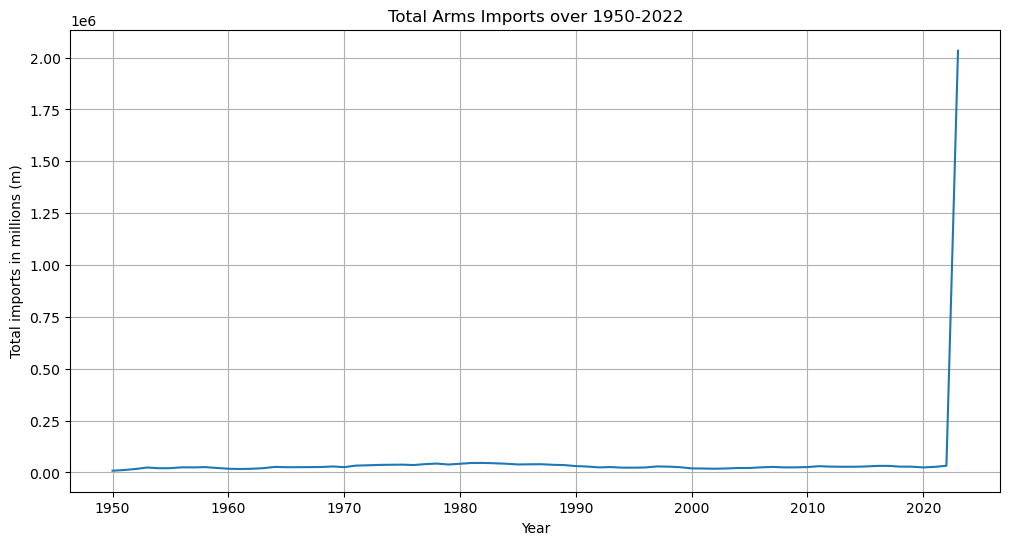

In [514]:
total_imports = all_arms_imports.iloc[-1:].sum()
plt.figure(figsize=(12,6))
total_imports.plot(kind='line')
plt.title('Total Arms Imports over 1950-2022')
plt.xlabel('Year')
plt.ylabel('Total imports in millions (m)')
plt.grid(True)
plt.show()

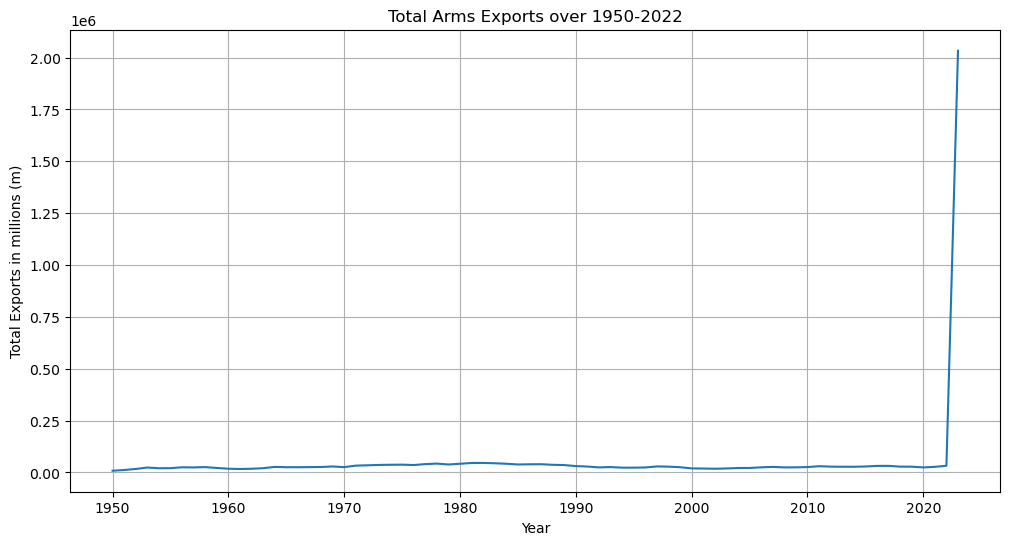

In [515]:
total_exports = all_arms_exports.iloc[-1:].sum()
plt.figure(figsize=(12,6))
total_imports.plot(kind='line')
plt.title('Total Arms Exports over 1950-2022')
plt.xlabel('Year')
plt.ylabel('Total Exports in millions (m)')
plt.grid(True)
plt.show()

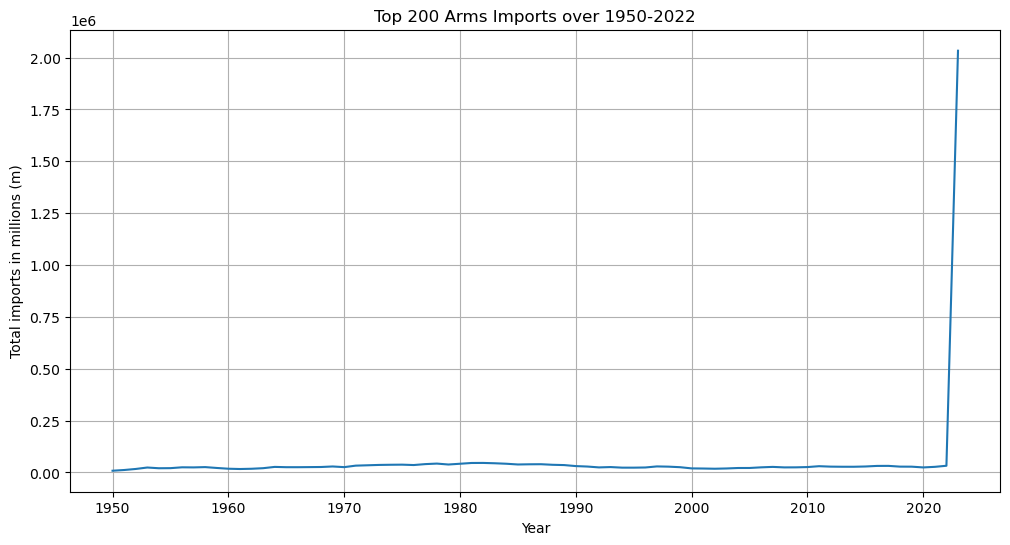

In [516]:
top_imports = top_200_arms_imports.iloc[-1:, 1:].sum()
plt.figure(figsize=(12,6))
top_imports.plot(kind='line')
plt.title('Top 200 Arms Imports over 1950-2022')
plt.xlabel('Year')
plt.ylabel('Total imports in millions (m)')
plt.grid(True)
plt.show()

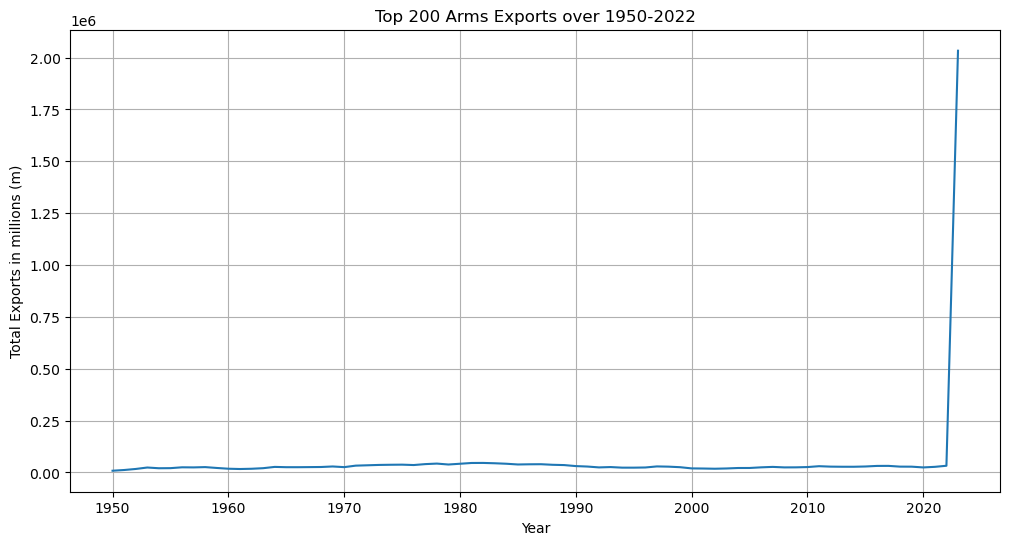

In [517]:
top_exports = top_200_arms_exports.iloc[-1:, 1:].sum()
plt.figure(figsize=(12,6))
top_exports.plot(kind='line')
plt.title('Top 200 Arms Exports over 1950-2022')
plt.xlabel('Year')
plt.ylabel('Total Exports in millions (m)')
plt.grid(True)
plt.show()

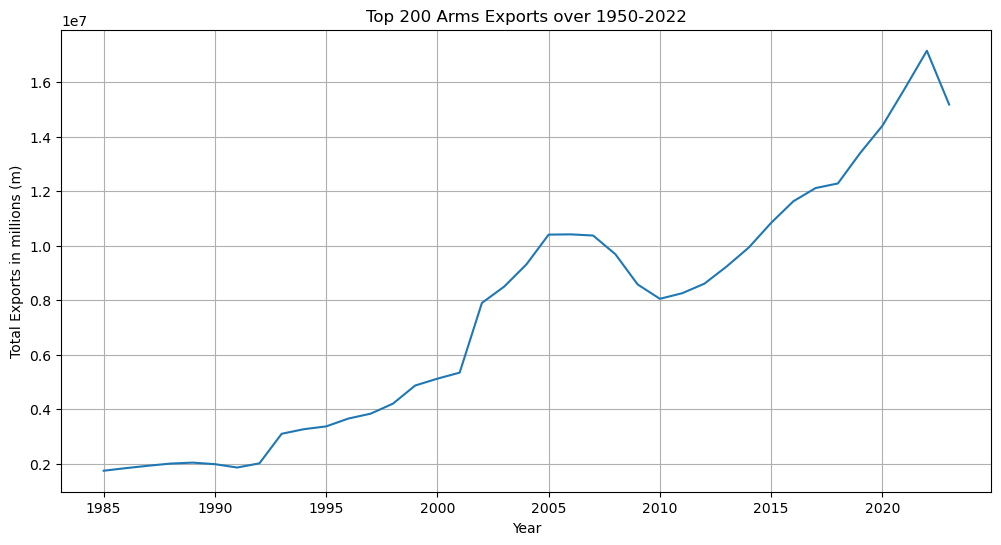

In [518]:
cons_real_estate = bloom_consg_USCAN.iloc[1:,5:].sum()
plt.figure(figsize=(12,6))
cons_real_estate.plot(kind='line')
plt.title('Top 200 Arms Exports over 1950-2022')
plt.xlabel('Year')
plt.ylabel('Total Exports in millions (m)')
plt.grid(True)
plt.show()

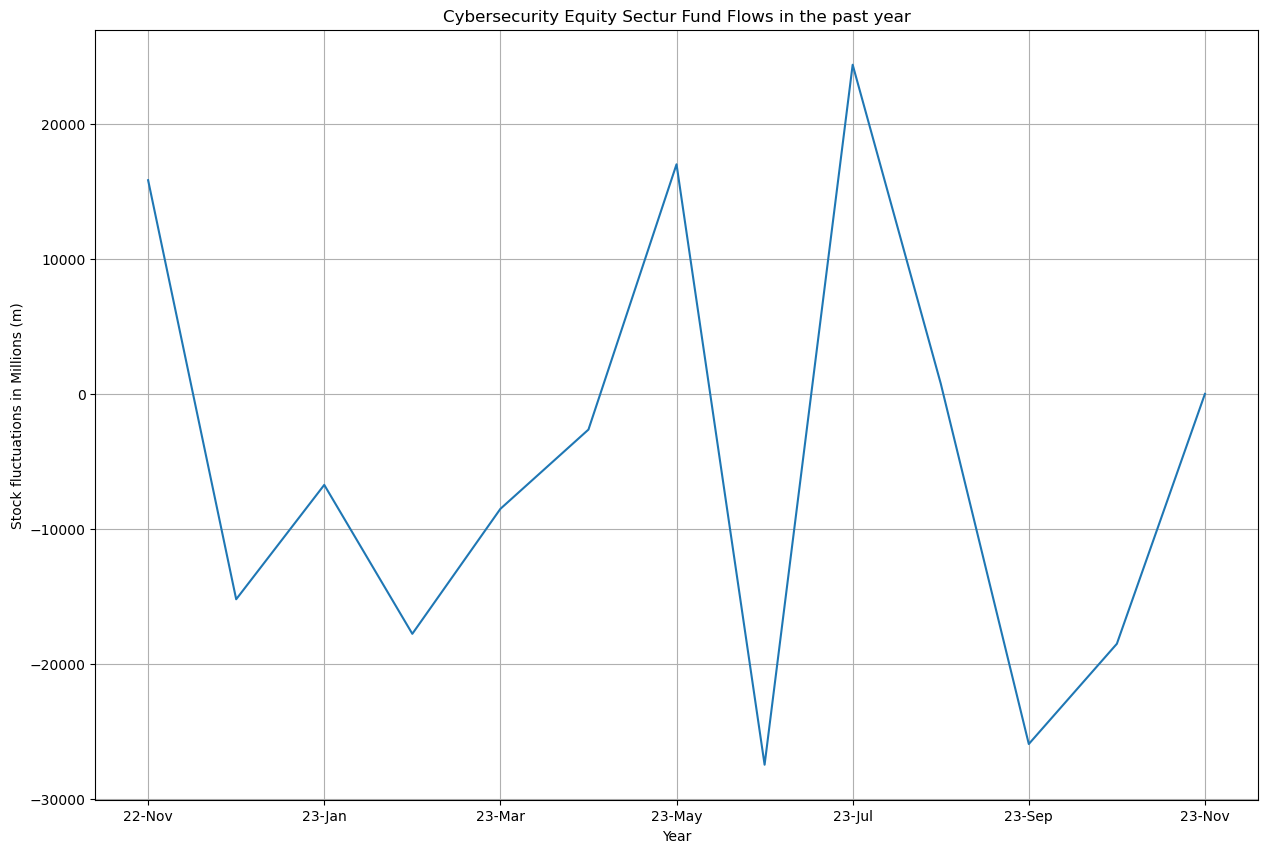

In [519]:
cyber = bloom_cybersec_equity_flows.iloc[1:,5:].sum()
plt.figure(figsize=(15,10))
cyber.plot(kind='line')
plt.title('Cybersecurity Equity Sectur Fund Flows in the past year')
plt.xlabel('Year')
plt.ylabel('Stock fluctuations in Millions (m)')
plt.grid(True)
plt.show()

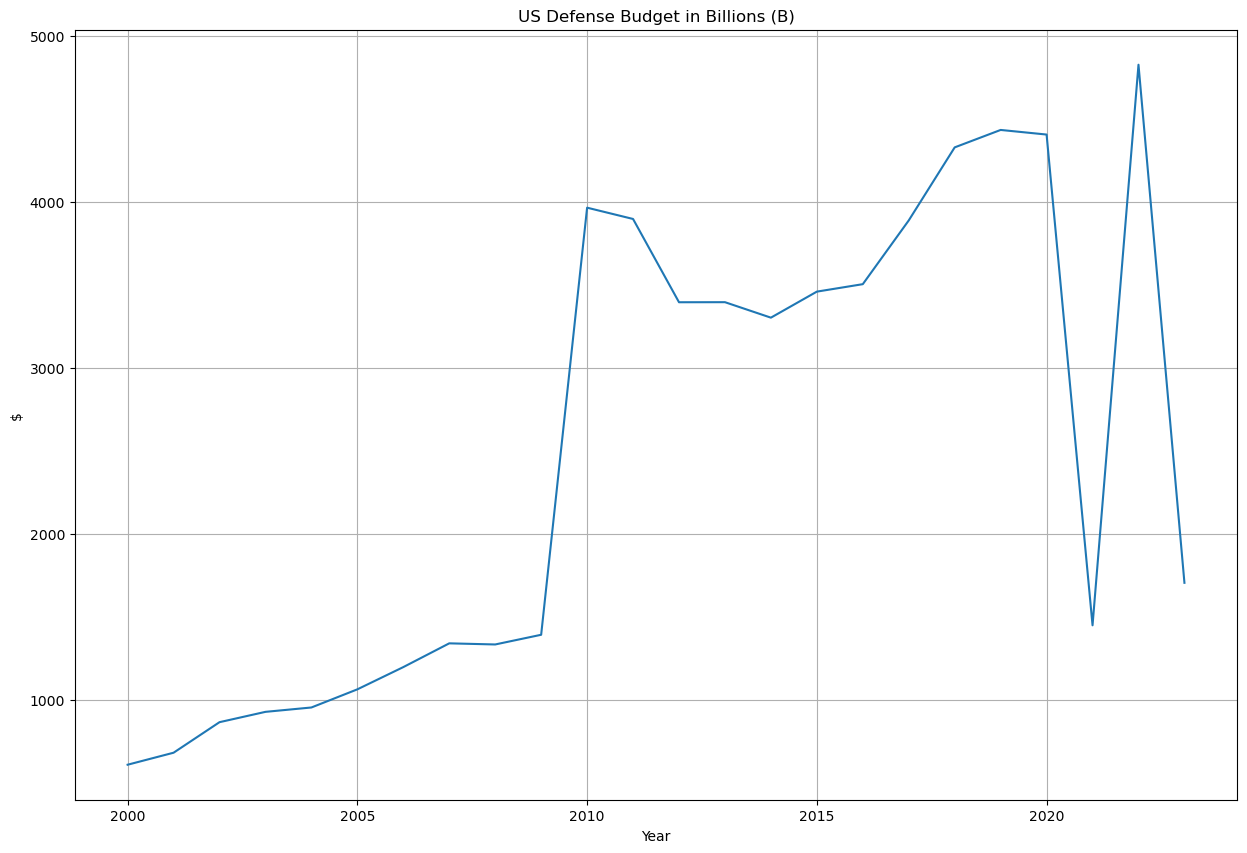

In [520]:
def_budget = bloom_def_budget.iloc[1:,5:].sum()
plt.figure(figsize=(15,10))
def_budget.plot(kind='line')
plt.title('US Defense Budget in Billions (B)')
plt.xlabel('Year')
plt.ylabel('$')
plt.grid(True)
plt.show()


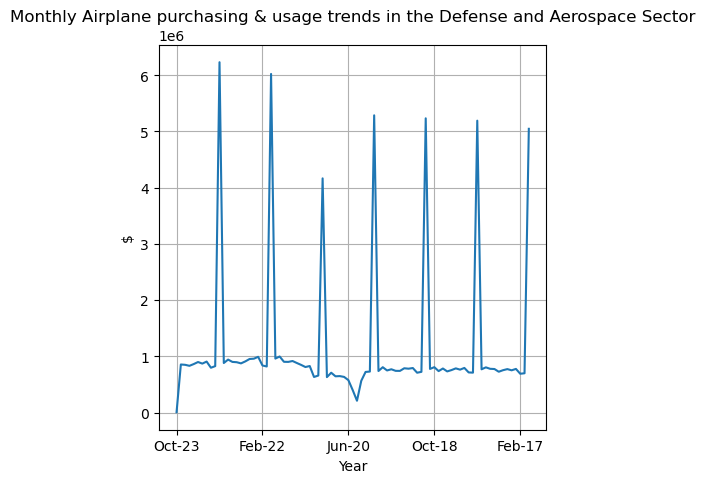

In [521]:
def_industry = bloom_def_industry.iloc[1:,5:].sum()
plt.figure(figsize=(5,5))
def_industry.plot(kind='line')
plt.title('Monthly Airplane purchasing & usage trends in the Defense and Aerospace Sector')
plt.xlabel('Year')
plt.ylabel('$')
plt.grid(True)
plt.show()

/var/folders/7m/cypxsrvj0gg8y4k47yn_93t00000gn/T/ipykernel_47501/4074354150.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gdp_line = gdp.iloc[1:,5:].sum()


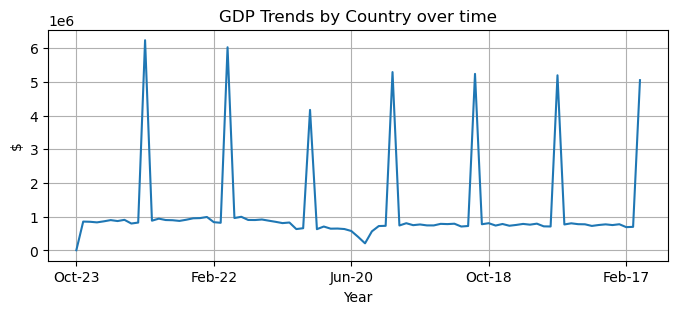

In [522]:
gdp_line = gdp.iloc[1:,5:].sum()
plt.figure(figsize=(8,3))
def_industry.plot(kind='line')
plt.title('GDP Trends by Country over time')
plt.xlabel('Year')
plt.ylabel('$')
plt.grid(True)
plt.show()

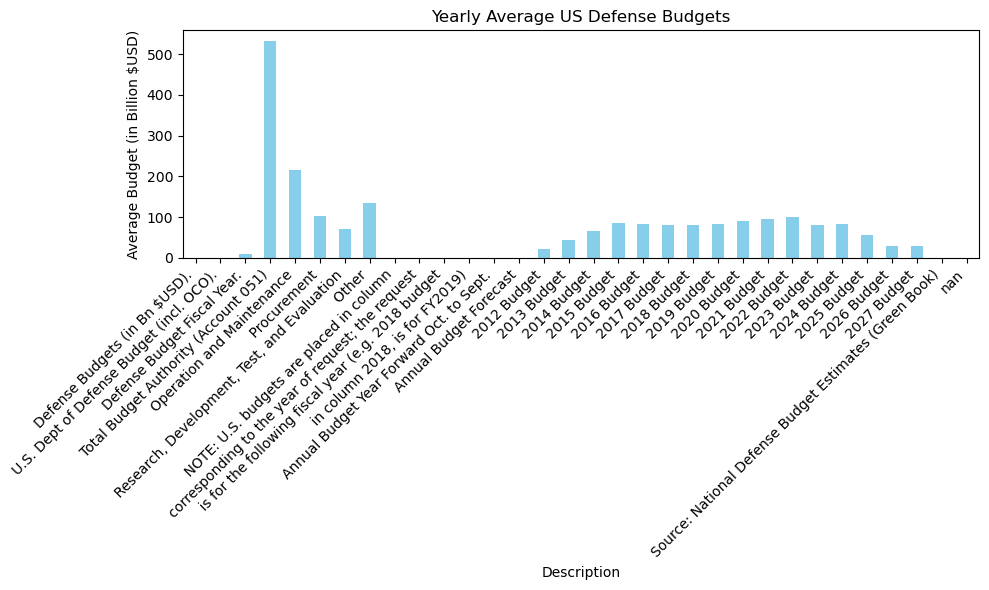

In [523]:
# Filtering out any potential NaN values for safety
yearly_avg_budget_clean = yearly_avg_budget_clean.dropna()

plt.figure(figsize=(10, 6))  # Set a reasonable figure size
yearly_avg_budget_clean.plot(kind='bar', color='skyblue')  # Bar chart

plt.title('Yearly Average US Defense Budgets')  # Add a title
plt.xlabel('Description')  # X-axis label - descriptions
plt.ylabel('Average Budget (in Billion $USD)')  # Y-axis label - average budget
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout for a nice fit
plt.show()  # Display the plot

# 5. Data Manipulation

In [524]:
numeric_rows = bloom_def_budget.select_dtypes(include=[float, int])  # Keep only numeric rows

# Calculating the average across years (columns)
yearly_avg_budget = numeric_rows.mean(axis=1)

# Displaying the results
yearly_avg_budget


# Filtering out non-relevant rows
relevant_descriptions = numeric_rows.dropna().index  # Dropping rows with NaNs

# Recalculating the average for relevant descriptions
yearly_avg_budget_clean = numeric_rows.loc[relevant_descriptions].mean(axis=1)

# Displaying the cleaned-up results
yearly_avg_budget_clean


Description
Defense Budgets (in Bn $USD).                               0.000000
U.S. Dept of Defense Budget (incl. OCO).                    0.000000
Defense Budget Fiscal Year.                                 9.714286
Total Budget Authority (Account 051)                      531.915893
    Operation and Maintenance                             216.691393
    Procurement                                           102.891714
    Research, Development, Test, and Evaluation            70.214000
    Other                                                 134.554429
    NOTE: U.S. budgets are placed in column                 0.000000
    corresponding to the year of request; the request       0.000000
    is for the following fiscal year (e.g. 2018 budget      0.000000
    in column 2018, is for FY2019)                          0.000000
Annual Budget Year Forward Oct. to Sept.                    0.000000
Annual Budget Forecast                                      0.000000
    2012 Budget       